In [1]:
import numpy as np

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
N = 1001
l = 10
xvec, dx = np.linspace(-l, l, N, retstep=True)
print(dx)
print(dx - (xvec[1] - xvec[0]))

0.02
4.2674197509029455e-16


In [4]:
# effective grid
# grid scaling
# this determines the density of our Gaussians
# which relates the number of bases we are using
# a Gaussian will cented every gs*dx step
# gs = 10

# this is the grid of center positions for our
# Gaussian basis
# xx = np.arange((N-1)//gs + 1) * dx * gs - l

# gx = dx*gs

# Let's redo the above code so that we can directly
# set the number of bases we use
Ng = 101
xx, gx = np.linspace(-l, l, Ng, retstep=True)

# where gx = gs*dx
gs = gx/dx

print(gs)
print(xx.shape)
print(xx)

10.0
(101,)
[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]


0.3122156766261402


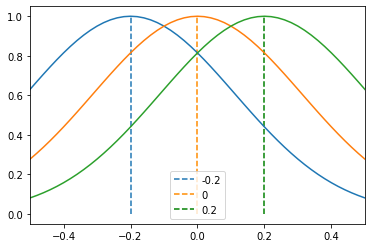

In [34]:
# for plotting
def gauss(x, j):
    return np.exp(-0.5*((x - j*gx)/sigma)**2)

# this should insure that regardless of how many bases
# we use the overlate will be about the same
# fracmax sets at what fraction of the maximum hight
# we want our basis Gaussians to overlap
fracmax = .95
sigma = gx / (2 * np.sqrt(2 * np.log(1/fracmax) ) ) 
print(sigma)



plt.plot(xvec, gauss(xvec,-1))
plt.vlines(-1*gx, ymin=0, ymax=1, label=-1*gx, linestyles='dashed')
plt.plot(xvec, gauss(xvec,0))
plt.vlines(0, ymin=0, ymax=1, label=0, color='darkorange', linestyles='dashed')
plt.plot(xvec, gauss(xvec,1))
plt.vlines(gx, ymin=0, ymax=1, label=gx, color='green', linestyles='dashed')
plt.xlim([-0.5,0.5])
plt.legend()
plt.show()

In [37]:
# We want a matrix which is constructed by evaluating
# each of the shifted Gaussians at all of the spacial
# grid points
# Here we have one Gaussian centered at each spacial
# grid point
# gmat = np.exp(-(np.expand_dims(xx,0) - np.expand_dims(xx,1))**2 / sigma)
# Because of broadcasting we only need to expand one of the arrays
# so that thegmat = np.exp(-(xx - np.expand_dims(xx,1))**2 / sigma) dimension is (#, 1)
# gmat = np.exp(-(xx - np.expand_dims(xx,1))**2 / sigma)
fracmax = 0.80
sigma = gx / (2 * np.sqrt(2 * np.log(1/fracmax) ) ) 
gmat = np.exp(-0.5*((xx - np.expand_dims(xx,1))/sigma)**2)
print(gmat.shape)
np.linalg.cond(gmat)

(101, 101)


7.923065721950545

In [38]:
# gmatplot = np.exp(-(np.expand_dims(xx,0) - np.expand_dims(xvec,1))**2 / sigma)
gmatplot = np.exp(-0.5*((xx - np.expand_dims(xvec,1))/sigma)**2)
print(gmatplot.shape)

(1001, 101)


In [39]:
def myfunc(x):
    # out = (x < -3)*(x+3)**3/350 + ((x >= -3) & (x < 6))*(np.exp(-x - 3) - 1) + (x >= 6)*(np.exp(-9) - 1 + (x-6)**2/14)
    out = 2*np.cos(x) + np.sin(5*x)
    return out

In [40]:
coefs = np.linalg.inv(gmat) @ myfunc(xx)

In [41]:
coefs

array([-1.37661265, -0.05105703, -0.6351849 , -1.11754093, -1.70597173,
       -1.57412612, -0.89009925, -0.14398377,  0.08575261, -0.25357085,
       -0.68220863, -0.62122286,  0.06192276,  0.9264284 ,  1.35496257,
        1.11456686,  0.56424936,  0.31948173,  0.68194334,  1.35911475,
        1.73159038,  1.42243221,  0.64509888,  0.0100149 , -0.03249473,
        0.39909371,  0.73271062,  0.47563864, -0.32507037, -1.11830785,
       -1.34821747, -0.95833225, -0.43731427, -0.36449016, -0.87322207,
       -1.5256476 , -1.71405796, -1.21993641, -0.41666725,  0.07052638,
       -0.06510705, -0.53544964, -0.72892323, -0.2799136 ,  0.5876011 ,
        1.2584464 ,  1.28456776,  0.79024367,  0.35191249,  0.4633356 ,
        1.07801706,  1.64972138,  1.63392643,  0.98920807,  0.21755567,
       -0.09353619,  0.19365458,  0.64636856,  0.66596806,  0.04559417,
       -0.83211972, -1.33935486, -1.17317875, -0.62754498, -0.31740555,
       -0.60880999, -1.27913553, -1.71995973, -1.49612747, -0.74

0.37606676329526634


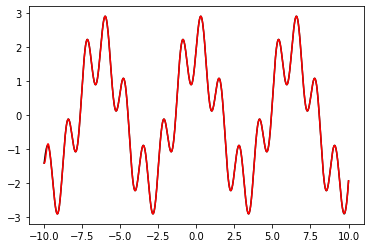

In [42]:
myfuncapprox = gmatplot @ coefs

print(np.linalg.norm(myfunc(xvec) - myfuncapprox)) # 0.18633125114381555 for Ng=101

plt.plot(xvec, myfunc(xvec), color='black')

plt.plot(xvec, myfuncapprox, color='red')
plt.show()

total length: 46
min value: 0.03747573354806387
index of min: 45
last value: 0.03747573354806387


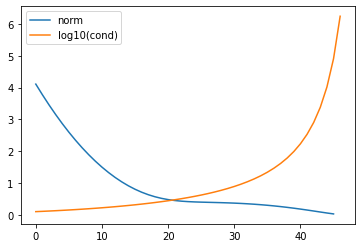

In [53]:
norm = []
cond = []
for i in range(0, 49):
    fracmax = 0.5 + 0.01*i
    sigma = gx / (2 * np.sqrt(2 * np.log(1/fracmax) ) ) 
    gmat = np.exp(-0.5*((xx - np.expand_dims(xx,1))/sigma)**2)
    cond.append(np.linalg.cond(gmat))
    if cond[-1] > 1e5:
        break
    else:
        gmatplot = np.exp(-0.5*((xx - np.expand_dims(xvec,1))/sigma)**2)
        coefs = np.linalg.inv(gmat) @ myfunc(xx)
        myfuncapprox = gmatplot @ coefs
        norm.append(np.linalg.norm(myfunc(xvec) - myfuncapprox))

#print('i=10 value:', norm[10])
print('total length:', len(norm))
print('min value:', np.amin(norm))
print('index of min:', np.argmin(norm))
print('last value:', norm[-1])
plt.plot(norm, label='norm')
plt.plot(np.log10(cond), label='log10(cond)')
plt.legend()
plt.show()